In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [101]:
#import data from .csv file
weather = pd.DataFrame(pd.read_csv("Weather Dataset.csv"))
weather.head()

,lat,lon,time,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,...,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
0,30.0,70.0,1/1/2015,0.14300,0.10950,0.12600,5.60,1.75,0.75,40.75,...,296.8,282.67500,296.725,4.350000,1.275001,-2.599999,-6.600,-3.925,-3.200000,-9999.0
1,30.0,70.0,1/2/2015,0.02925,0.02450,0.06525,8.40,20.50,19.00,34.50,...,296.8,284.15000,296.700,12.125002,5.850001,-1.749999,-5.075,-3.975,-2.200000,-9999.0
2,30.0,70.0,1/3/2015,0.18125,0.16325,0.10375,11.35,29.50,46.50,41.00,...,296.8,284.67500,296.600,26.575000,10.875000,0.775001,-13.925,-5.725,-0.874999,-9999.0
3,30.0,70.0,1/4/2015,0.12350,0.07725,-0.09000,12.40,36.50,38.75,40.50,...,296.8,285.15002,296.550,35.949997,18.375000,1.325000,-20.400,-6.050,2.925002,-9999.0
4,30.0,70.0,1/5/2015,-0.04575,0.04225,0.01700,11.25,20.75,22.25,38.75,...,296.8,285.75000,296.500,40.700000,17.400002,3.175001,-7.900,-6.550,1.575000,-9999.0


In [102]:
m = len(weather)
m

17902

In [103]:
weather.shape

(17902, 21)

In [104]:
#Training and Testing Splitting
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(weather, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape

(12531, 21)

In [105]:
df_test.shape

(5371, 21)

In [106]:
num_vars = ['lat', 'lon','omega_x', 'omega_y', 'omega', 'pr_wtr', 'rhum_x','rhum_y', 'rhum', 'slp', 'tmp_x', 'tmp_y', 'tmp','uwnd_x', 'uwnd_y', 'uwnd', 'vwnd_x', 'vwnd_y', 'vwnd','rain']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
6643,27.5,70.0,0.01800,0.05875,0.04075,44.225000,42.75,34.00,58.75,100162.5,297.7,308.575,301.67502,0.500000,-4.224999,2.925001,4.675000,-1.599999,3.875001,0.0
7858,27.5,72.5,0.06475,0.01100,-0.02200,7.625000,14.00,15.50,10.50,101892.5,296.7,284.875,298.34998,4.100001,6.775000,0.725001,-3.525000,-3.100000,-0.400000,0.0
12706,25.0,70.0,0.06075,-0.05575,-0.09500,34.324997,4.75,39.25,23.75,99580.0,299.6,310.900,301.40000,6.275000,5.500001,11.150000,-12.025000,-4.974999,0.250001,-9999.0
6830,27.5,70.0,-0.11150,0.04575,0.10000,13.475000,69.75,13.00,34.25,101855.0,297.7,285.125,297.42502,27.300000,15.250002,1.750001,26.349998,10.000000,-3.450000,0.0
12965,25.0,72.5,-0.00200,-0.02275,-0.08225,23.500000,36.25,30.50,32.75,100890.0,297.6,304.825,296.50000,12.200001,9.400002,5.125001,4.800000,1.275000,2.250001,0.0


In [107]:
df_Newtrain.shape

(12531, 20)

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# input Normalization
scaler = MinMaxScaler()   
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(10)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
6643,0.5,0.000000,0.548525,0.745501,0.686063,0.598305,0.4275,0.3400,0.5875,0.364272,0.703125,0.857716,0.819031,0.239471,0.272678,0.572552,0.573614,0.405825,0.627315,0.975484
7858,0.5,0.333333,0.590633,0.708138,0.625958,0.102034,0.1400,0.1550,0.1050,0.804196,0.546875,0.224449,0.570894,0.290694,0.513115,0.495629,0.448184,0.366990,0.436510,0.975484
12706,0.0,0.000000,0.587030,0.655908,0.556034,0.464068,0.0475,0.3925,0.2375,0.216147,1.000000,0.919840,0.798507,0.321642,0.485246,0.860140,0.318164,0.318447,0.465521,0.000000
6830,0.5,0.000000,0.431885,0.735329,0.742816,0.181356,0.6975,0.1300,0.3425,0.794660,0.703125,0.231129,0.501867,0.620802,0.698361,0.531469,0.905162,0.706149,0.300379,0.975484
12965,0.0,0.333333,0.530511,0.681729,0.568247,0.317288,0.3625,0.3050,0.3275,0.549269,0.687500,0.757515,0.432836,0.405948,0.570492,0.649476,0.575526,0.480259,0.554787,0.975484
7839,0.5,0.333333,0.656384,0.744914,0.698276,0.067797,0.2175,0.0300,0.1575,0.714558,0.546875,0.274549,0.649254,0.457527,0.498907,0.466783,0.396176,0.339806,0.483374,0.975484
12358,0.0,0.000000,0.450574,0.655321,0.563697,0.793898,0.4775,0.4675,0.7200,0.242212,1.000000,0.755511,0.813433,0.240538,0.328962,0.401224,0.505163,0.302913,0.352823,0.000000
16253,0.0,1.000000,0.647600,0.654145,0.518676,0.357559,0.0375,0.7925,0.2200,0.380674,0.421875,0.870408,0.464178,0.359704,0.526120,0.645804,0.321606,0.162460,0.341441,0.975484
10668,0.5,1.000000,0.651205,0.761346,0.603688,0.230508,0.0175,0.0400,0.2550,0.517483,0.562500,0.540414,0.619403,0.562820,0.451913,0.556818,0.461568,0.318447,0.298148,0.975484
9641,0.5,0.666667,0.583652,0.714984,0.692529,0.073220,0.2100,0.0025,0.2650,0.675779,0.468750,0.217769,0.541045,0.621870,0.625683,0.554196,0.580115,0.436246,0.455479,0.975484


In [109]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(10)

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd,rain
1369,1.0,0.000000,0.600572,0.669651,0.592680,0.185409,0.072864,0.523810,0.1500,0.527995,0.562500,0.669677,0.858209,0.399487,0.314841,0.487250,0.486842,0.381890,0.494937,0.000000
4780,1.0,1.000000,0.532205,0.538646,0.461924,0.240925,0.231156,0.401003,0.1975,0.465495,0.000000,0.748387,0.238806,0.264961,0.417378,0.523679,0.544505,0.487533,0.478481,0.968428
9383,0.5,0.666667,0.545175,0.562009,0.478453,0.192171,0.155779,0.558897,0.2425,0.482422,0.468750,0.389032,0.231343,0.825602,0.567330,0.480874,0.370743,0.513123,0.515190,0.968428
12314,0.0,0.000000,0.577050,0.692576,0.540437,0.504270,0.095477,0.318296,0.4225,0.380859,1.000000,0.872903,0.679104,0.487900,0.474869,0.654827,0.590944,0.421260,0.463291,0.000000
11919,0.0,0.000000,0.528688,0.645197,0.574675,0.493950,0.135678,0.105263,0.5675,0.451172,1.000000,0.776774,0.559701,0.441439,0.436937,0.644809,0.568885,0.503281,0.575949,0.000000
12128,0.0,0.000000,0.536601,0.665721,0.670897,0.305338,0.140704,0.097744,0.4525,0.658203,1.000000,0.564516,0.845149,0.560363,0.626007,0.532787,0.623065,0.530184,0.500000,0.000000
4112,1.0,0.666667,0.600791,0.630568,0.527745,0.320641,0.055276,0.195489,0.2075,0.250651,0.687500,0.916774,0.591418,0.230289,0.340327,0.408925,0.388545,0.242782,0.456962,0.968428
5818,0.5,0.000000,0.753572,0.777074,0.601830,0.364057,0.130653,0.320802,0.5050,0.479167,0.703125,0.634839,0.438431,0.649816,0.504504,0.390710,0.276316,0.261155,0.422785,0.968428
9251,0.5,0.666667,0.767202,0.774891,0.638430,0.081139,0.027638,0.000000,0.1450,0.681641,0.468750,0.427742,0.589552,0.499688,0.404338,0.491803,0.299923,0.229659,0.313924,0.968428
9311,0.5,0.666667,0.777314,0.792795,0.697166,0.077936,0.198492,0.150376,0.0225,0.763021,0.468750,0.221290,0.395522,0.478885,0.524656,0.446266,0.254644,0.110236,0.267089,0.968428


In [110]:
y_Newtrain = df_Newtrain.pop('rain')
X_Newtrain = df_Newtrain

In [111]:
X_Newtrain.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
6643,0.5,0.000000,0.548525,0.745501,0.686063,0.598305,0.4275,0.3400,0.5875,0.364272,0.703125,0.857716,0.819031,0.239471,0.272678,0.572552,0.573614,0.405825,0.627315
7858,0.5,0.333333,0.590633,0.708138,0.625958,0.102034,0.1400,0.1550,0.1050,0.804196,0.546875,0.224449,0.570894,0.290694,0.513115,0.495629,0.448184,0.366990,0.436510
12706,0.0,0.000000,0.587030,0.655908,0.556034,0.464068,0.0475,0.3925,0.2375,0.216147,1.000000,0.919840,0.798507,0.321642,0.485246,0.860140,0.318164,0.318447,0.465521
6830,0.5,0.000000,0.431885,0.735329,0.742816,0.181356,0.6975,0.1300,0.3425,0.794660,0.703125,0.231129,0.501867,0.620802,0.698361,0.531469,0.905162,0.706149,0.300379
12965,0.0,0.333333,0.530511,0.681729,0.568247,0.317288,0.3625,0.3050,0.3275,0.549269,0.687500,0.757515,0.432836,0.405948,0.570492,0.649476,0.575526,0.480259,0.554787


In [112]:
y_Newtrain.head()

6643     0.975484
7858     0.975484
12706    0.000000
6830     0.975484
12965    0.975484
Name: rain, dtype: float64

In [113]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [0.97548354 0.97548354 0.         0.97548354 0.97548354 0.97548354
 0.         0.97548354 0.97548354 0.97548354]


In [114]:
# training set preparation

X1 = df_Newtrain.values[:, 0]      
X2 = df_Newtrain.values[:, 1]              
X3 = df_Newtrain.values[:, 2]                
X4 = df_Newtrain.values[:, 3]              
X5 = df_Newtrain.values[:, 4]     
X6 = df_Newtrain.values[:, 5] 
X7 = df_Newtrain.values[:, 6] 
X8 = df_Newtrain.values[:, 7] 
X9 = df_Newtrain.values[:, 8] 
X10 = df_Newtrain.values[:, 9] 
X11 = df_Newtrain.values[:, 10] 
X12 = df_Newtrain.values[:, 11] 
X13 = df_Newtrain.values[:, 12] 
X14 = df_Newtrain.values[:, 13] 
X15 = df_Newtrain.values[:, 14] 
X16 = df_Newtrain.values[:, 15] 
X17 = df_Newtrain.values[:, 16] 
X18 = df_Newtrain.values[:, 17] 
X19 = df_Newtrain.values[:, 18] 

In [115]:
m = len(X_Newtrain)        
X_0 = np.ones((m, 1))      # Single column matrix with all ones
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [116]:
# 1D arrays to 2D array conversion
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)
X_12 = X12.reshape(m, 1)
X_13 = X13.reshape(m, 1)
X_14 = X14.reshape(m, 1)
X_15 = X15.reshape(m, 1)
X_16 = X16.reshape(m, 1)
X_17 = X17.reshape(m, 1)
X_18 = X18.reshape(m, 1)
X_19 = X19.reshape(m, 1)

In [117]:
# Final X Matrix for training
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19))

In [118]:
theta = np.zeros(20)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [119]:
y_Newtest = df_Newtest.pop('rain')
X_Newtest = df_Newtest

In [120]:
X_Newtest.head()

,lat,lon,omega_x,omega_y,omega,pr_wtr,rhum_x,rhum_y,rhum,slp,tmp_x,tmp_y,tmp,uwnd_x,uwnd_y,uwnd,vwnd_x,vwnd_y,vwnd
1369,1.0,0.000000,0.600572,0.669651,0.592680,0.185409,0.072864,0.523810,0.1500,0.527995,0.56250,0.669677,0.858209,0.399487,0.314841,0.487250,0.486842,0.381890,0.494937
4780,1.0,1.000000,0.532205,0.538646,0.461924,0.240925,0.231156,0.401003,0.1975,0.465495,0.00000,0.748387,0.238806,0.264961,0.417378,0.523679,0.544505,0.487533,0.478481
9383,0.5,0.666667,0.545175,0.562009,0.478453,0.192171,0.155779,0.558897,0.2425,0.482422,0.46875,0.389032,0.231343,0.825602,0.567330,0.480874,0.370743,0.513123,0.515190
12314,0.0,0.000000,0.577050,0.692576,0.540437,0.504270,0.095477,0.318296,0.4225,0.380859,1.00000,0.872903,0.679104,0.487900,0.474869,0.654827,0.590944,0.421260,0.463291
11919,0.0,0.000000,0.528688,0.645197,0.574675,0.493950,0.135678,0.105263,0.5675,0.451172,1.00000,0.776774,0.559701,0.441439,0.436937,0.644809,0.568885,0.503281,0.575949


In [121]:
y_Newtest.head()

1369     0.000000
4780     0.968428
9383     0.968428
12314    0.000000
11919    0.000000
Name: rain, dtype: float64

In [122]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [0.         0.96842799 0.96842799 0.         0.         0.
 0.96842799 0.96842799 0.96842799 0.96842799]


In [123]:
# testing/validarion set preparation
X1_test = df_Newtest.values[:, 0]                 
X2_test = df_Newtest.values[:, 1]                 
X3_test = df_Newtest.values[:, 2]                
X4_test = df_Newtest.values[:, 3]              
X5_test = df_Newtest.values[:, 4]    
X6_test = df_Newtest.values[:, 5]
X7_test = df_Newtest.values[:, 6]
X8_test = df_Newtest.values[:, 7]
X9_test = df_Newtest.values[:, 8]
X10_test = df_Newtest.values[:, 9]
X11_test = df_Newtest.values[:, 10]
X12_test = df_Newtest.values[:, 11]
X13_test = df_Newtest.values[:, 12]
X14_test = df_Newtest.values[:, 13]
X15_test = df_Newtest.values[:, 14]
X16_test = df_Newtest.values[:, 15]
X17_test = df_Newtest.values[:, 16]
X18_test = df_Newtest.values[:, 17]
X19_test = df_Newtest.values[:, 18]


print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])

X1_test =  [1.  1.  0.5 0.  0.  0.  1.  0.5 0.5 0.5]
X2_test =  [0.         1.         0.66666667 0.         0.         0.
 0.66666667 0.         0.66666667 0.66666667]
X3_test =  [0.60057154 0.53220486 0.54517475 0.57704988 0.52868761 0.53660144
 0.60079137 0.75357219 0.76720155 0.77731367]


In [124]:
m_test = len(X_Newtest)             
X_0_test = np.ones((m_test, 1))    # Single column matrix of all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [125]:
# 1D arrays of validation X's to 2D array conversion

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)
X_12_test = X12_test.reshape(m_test, 1)
X_13_test = X13_test.reshape(m_test, 1)
X_14_test = X14_test.reshape(m_test, 1)
X_15_test = X15_test.reshape(m_test, 1)
X_16_test = X16_test.reshape(m_test, 1)
X_17_test = X17_test.reshape(m_test, 1)
X_18_test = X17_test.reshape(m_test, 1)
X_19_test = X18_test.reshape(m_test, 1)

print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])

X_1_test =  [[1. ]
 [1. ]
 [0.5]
 [0. ]
 [0. ]]
X_2_test =  [[0.        ]
 [1.        ]
 [0.66666667]
 [0.        ]
 [0.        ]]


In [126]:
# Final Matrix for validation
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test, X_12_test, X_13_test, X_14_test, X_15_test, X_16_test, X_17_test, X_18_test, X_19_test))

In [127]:
# computing cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [128]:
# computing cost for initial theta values
cost = compute_cost(X, y, theta, m)
print('The initial cost for given theta values = ', cost)

The initial cost for given theta values =  0.3627923717833011


In [129]:
# definition of gradient descent

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # training loss
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # validation loss
    
    return theta, cost_history, cost_test

In [130]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 20000;
alpha = 0.1

In [131]:
# Computing final theta values
# Final cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('Cost_history =', cost_history)
print('Cost_test =', cost_test)

Final value of theta= [ 0.35988516 -0.28203502  0.35099893  0.22542387  0.51689082 -0.41519143
  0.80156983 -0.02583496 -0.25548259 -0.4214175   0.40082763 -0.82959172
  0.01201138  0.03852655  0.0141343   0.16730849 -0.00416901  0.14258964
  0.09633229  0.28691228]
Cost_history = [0.13667793 0.094292   0.08543899 ... 0.04194649 0.04194649 0.04194648]
Cost_test = [0.13503476 0.09399488 0.08542493 ... 0.04277552 0.04277551 0.04277551]


Text(0.5, 1.0, 'Convergence of Gradient Descent')

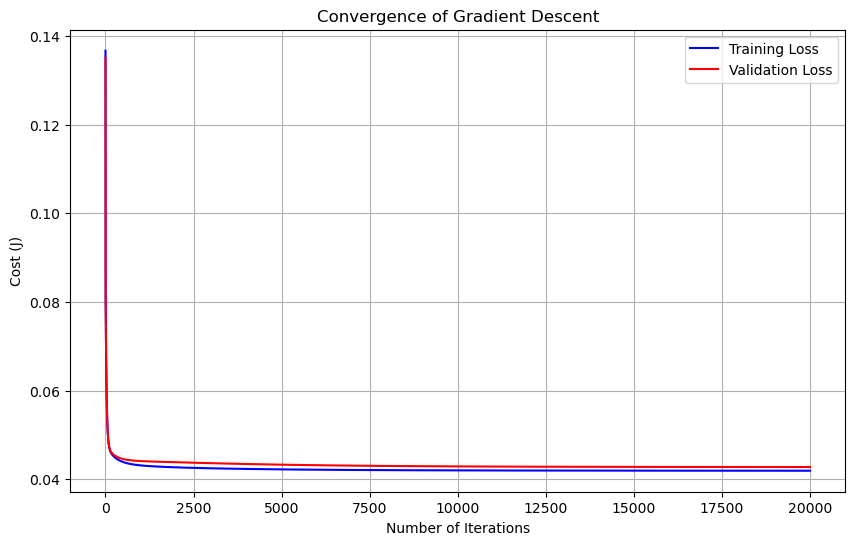

In [132]:
plt.plot(range(1, iterations + 1),cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')